
Model Accuracy: 0.7857356608478803

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.80      0.81      0.80     21626
    POSITIVE       0.77      0.76      0.76     18474

    accuracy                           0.79     40100
   macro avg       0.78      0.78      0.78     40100
weighted avg       0.79      0.79      0.79     40100


Confusion Matrix:
 [[17534  4092]
 [ 4500 13974]]


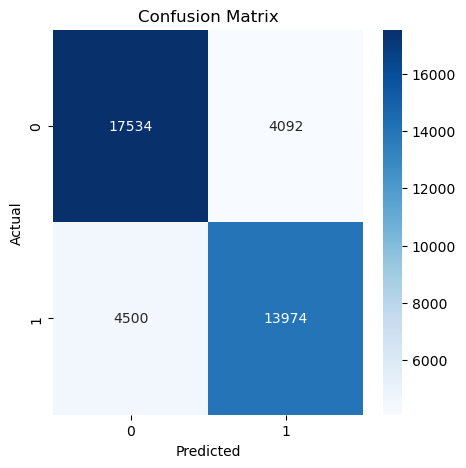

In [6]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Data
file_path = "/Users/udaysinghshekhawat/Documents/news sentimental modle/News_sentiment_Jan2017_to_Apr2021.csv"
df = pd.read_csv(file_path)

# Step 2: Preprocess Text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove extra spaces
    return text

df['Cleaned_Title'] = df['Title'].astype(str).apply(clean_text)

# Step 3: Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(max_features=5000)  # Using 5000 most frequent words
X = vectorizer.fit_transform(df['Cleaned_Title'])
y = df['sentiment']  # Assuming 'sentiment' contains labels like -1 (negative), 0 (neutral), 1 (positive)

# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Model (Logistic Regression)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 7: Plot Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()